In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-washington/airbnb_Washington.csv


In [2]:
df = pd.read_csv('/kaggle/input/airbnb-washington/airbnb_Washington.csv')

In [3]:
df.describe()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,superhost_observed_in_period,host_is_superhost_in_period,superhost_ratio,prev_superhost_period_all,prev_host_is_superhost_in_period,prev_scrapes_in_period,...,prev_host_is_superhost2,prev_year_superhosts,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean
count,1.337410e+05,1.337410e+05,133741.000000,133741.000000,133741.000000,133741.000000,133741.000000,133741.000000,133741.000000,133741.000000,...,133741.000000,133741.000000,133741.000000,1.337410e+05,133741.000000,133741.000000,133741.000000,133741.000000,71690.000000,68177.000000
mean,4.623191e+07,1.563364e+07,13.130656,76.715831,75.379285,0.270231,0.269412,12.130656,0.248989,70.588241,...,0.179107,0.639550,119972.328149,1.628831e+07,1247.985741,181450.689145,0.010392,0.011089,34.624890,36.753282
std,5.407648e+07,9.196920e+06,4.327151,315.882131,311.297965,0.444081,0.442141,4.327151,0.432429,297.390448,...,0.383444,1.101893,35346.884939,5.199564e+06,935.887665,158460.562516,0.006877,0.008489,31.916411,32.574222
min,1.585000e+03,3.192000e+03,5.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,68101.000000,9.178115e+06,0.000000,0.000000,0.000000,0.000000,-28.500000,-31.000000
25%,7.879195e+06,8.583164e+06,10.000000,4.000000,4.000000,0.000000,0.000000,9.000000,0.000000,4.000000,...,0.000000,0.000000,84467.000000,1.121246e+07,552.000000,65882.000000,0.004972,0.004408,11.000000,12.769231
50%,2.618078e+07,1.599006e+07,13.000000,4.000000,4.000000,0.000000,0.000000,12.000000,0.000000,4.000000,...,0.000000,0.000000,121747.000000,1.708997e+07,1049.000000,140340.000000,0.009234,0.009249,26.477767,28.658537
75%,6.409601e+07,2.074397e+07,17.000000,12.000000,12.000000,1.000000,1.000000,16.000000,0.000000,12.000000,...,0.000000,1.000000,144271.000000,2.004095e+07,1698.000000,251186.000000,0.014607,0.016237,49.500000,52.000000
max,3.634725e+08,4.281012e+07,20.000000,3417.000000,3417.000000,1.000000,1.000000,19.000000,1.000000,3417.000000,...,1.000000,3.000000,186902.000000,2.575621e+07,5733.000000,951524.000000,0.033644,0.043478,240.000000,233.000000


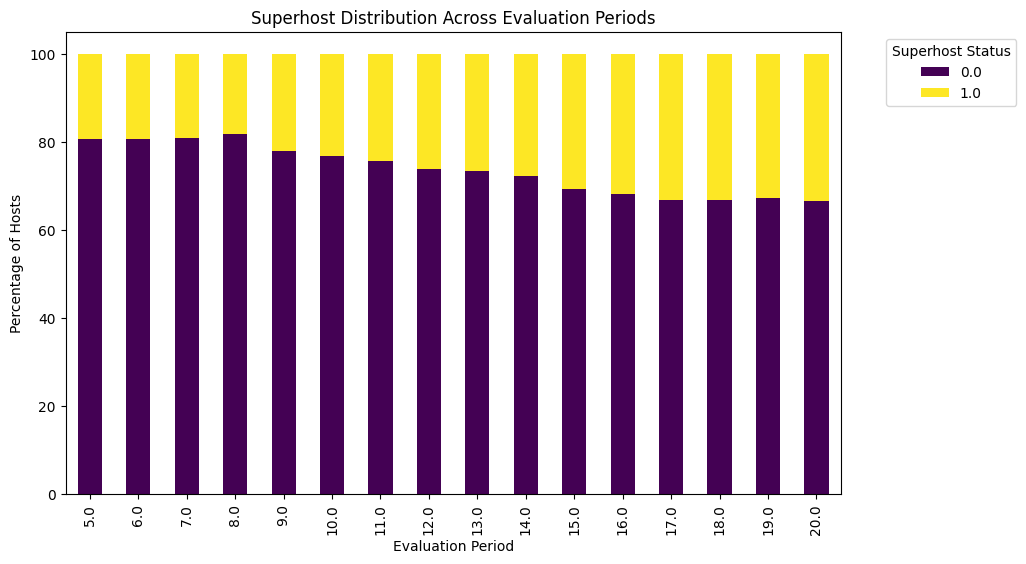

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Group by evaluation period and calculate the percentage of Superhosts
superhost_distribution = df.groupby('superhost_period_all')['host_is_superhost_in_period'].value_counts(normalize=True).unstack() * 100

# Plot the Superhost distribution
ax = superhost_distribution.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
ax.set_title('Superhost Distribution Across Evaluation Periods')
ax.set_xlabel('Evaluation Period')
ax.set_ylabel('Percentage of Hosts')
ax.legend(title='Superhost Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


/tmp/ipykernel_19/1825694190.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['superhost_change'] = subset_df['host_is_superhost_in_period'] - subset_df['prev_host_is_superhost_in_period']


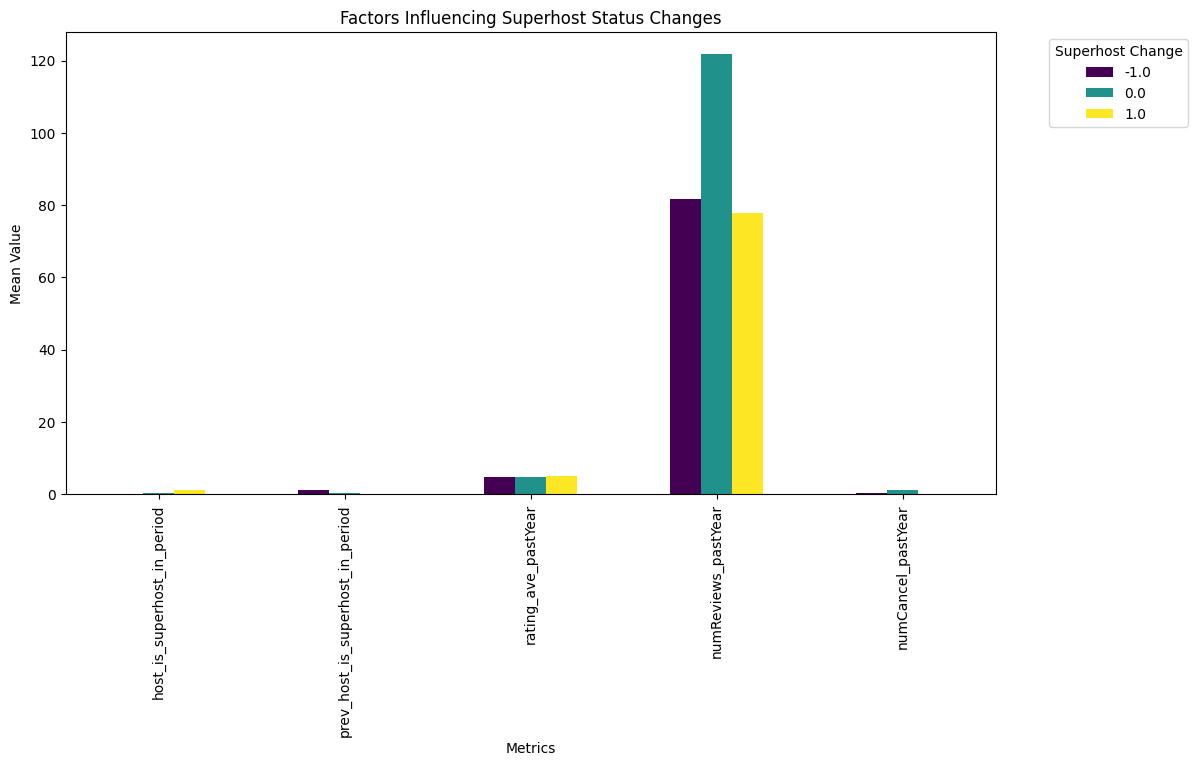

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Select relevant columns for analysis
selected_columns = ['host_is_superhost_in_period', 'prev_host_is_superhost_in_period', 'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear']

# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Identify hosts who gained, lost, or maintained Superhost status
subset_df['superhost_change'] = subset_df['host_is_superhost_in_period'] - subset_df['prev_host_is_superhost_in_period']

# Group by Superhost change and calculate mean values for other features
analysis_result = subset_df.groupby('superhost_change').mean()

# Plot the results
ax = analysis_result.T.plot(kind='bar', figsize=(12, 6), colormap='viridis')
ax.set_title('Factors Influencing Superhost Status Changes')
ax.set_xlabel('Metrics')
ax.set_ylabel('Mean Value')
ax.legend(title='Superhost Change', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Select relevant columns for analysis
selected_columns = ['host_is_superhost_in_period', 'prev_host_is_superhost_in_period', 'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear']

# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Identify hosts who gained, lost, or maintained Superhost status
subset_df['superhost_change'] = subset_df['host_is_superhost_in_period'] - subset_df['prev_host_is_superhost_in_period']

# Group by Superhost change and calculate mean values for other features
analysis_result = subset_df.groupby('superhost_change').mean()

# Perform t-test for each variable
for column in selected_columns[2:]:  # Exclude Superhost columns from the t-test
    gain_superhost = subset_df[subset_df['superhost_change'] == 1][column]
    lose_superhost = subset_df[subset_df['superhost_change'] == -1][column]
    
    t_stat, p_value = ttest_ind(gain_superhost, lose_superhost, equal_var=False)
    
    print(f'Test for {column}:')
    print(f'T-statistic: {t_stat}')
    print(f'P-value: {p_value}')
    print(f'Is the difference significant? {"Yes" if p_value < 0.05 else "No"}')
    print('\n')


Test for rating_ave_pastYear:
T-statistic: nan
P-value: nan
Is the difference significant? No


Test for numReviews_pastYear:
T-statistic: nan
P-value: nan
Is the difference significant? No


Test for numCancel_pastYear:
T-statistic: nan
P-value: nan
Is the difference significant? No




/tmp/ipykernel_19/1279319631.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['superhost_change'] = subset_df['host_is_superhost_in_period'] - subset_df['prev_host_is_superhost_in_period']


In [7]:
import pandas as pd
import statsmodels.api as sm

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Select relevant columns for analysis
selected_columns = ['host_is_superhost_in_period', 'rating_ave_pastYear']

# Subset the DataFrame with selected columns
subset_df = df[selected_columns]

# Drop rows with missing values
subset_df = subset_df.dropna()

# Define the independent variable (X) and dependent variable (y)
X = sm.add_constant(subset_df['rating_ave_pastYear'])
y = subset_df['host_is_superhost_in_period']

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the regression
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.553181
         Iterations 7
                                Logit Regression Results                               
Dep. Variable:     host_is_superhost_in_period   No. Observations:                94549
Model:                                   Logit   Df Residuals:                    94547
Method:                                    MLE   Df Model:                            1
Date:                         Fri, 24 Nov 2023   Pseudo R-squ.:                  0.1624
Time:                                 03:50:01   Log-Likelihood:                -52303.
converged:                                True   LL-Null:                       -62440.
Covariance Type:                     nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const             

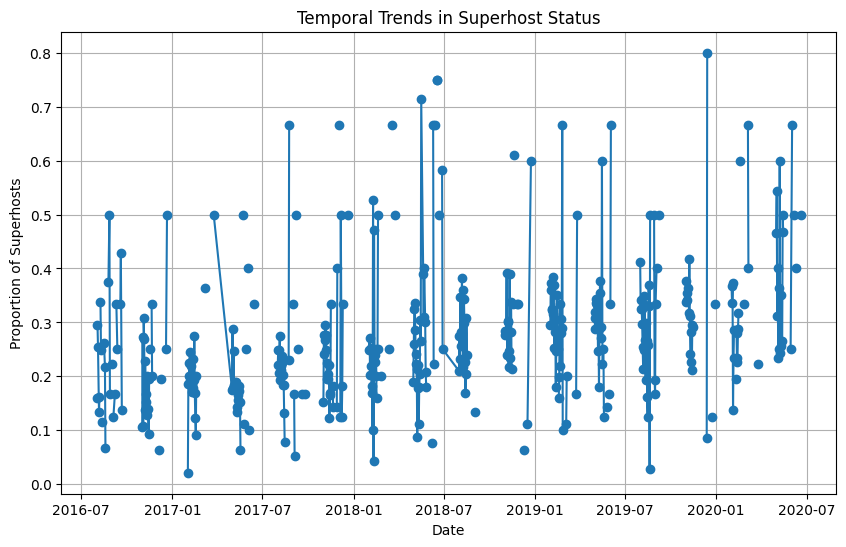

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Convert 'Scraped Date' to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Group by 'Scraped Date' and count the number of Superhosts
superhost_counts = df.groupby(['Scraped Date', 'host_is_superhost_in_period']).size().unstack()

# Calculate the proportion of Superhosts over time
superhost_proportion = superhost_counts[1] / (superhost_counts[0] + superhost_counts[1])

# Plotting the temporal trends
plt.figure(figsize=(10, 6))
plt.plot(superhost_proportion.index, superhost_proportion.values, marker='o', linestyle='-')
plt.title('Temporal Trends in Superhost Status')
plt.xlabel('Date')
plt.ylabel('Proportion of Superhosts')
plt.grid(True)
plt.show()


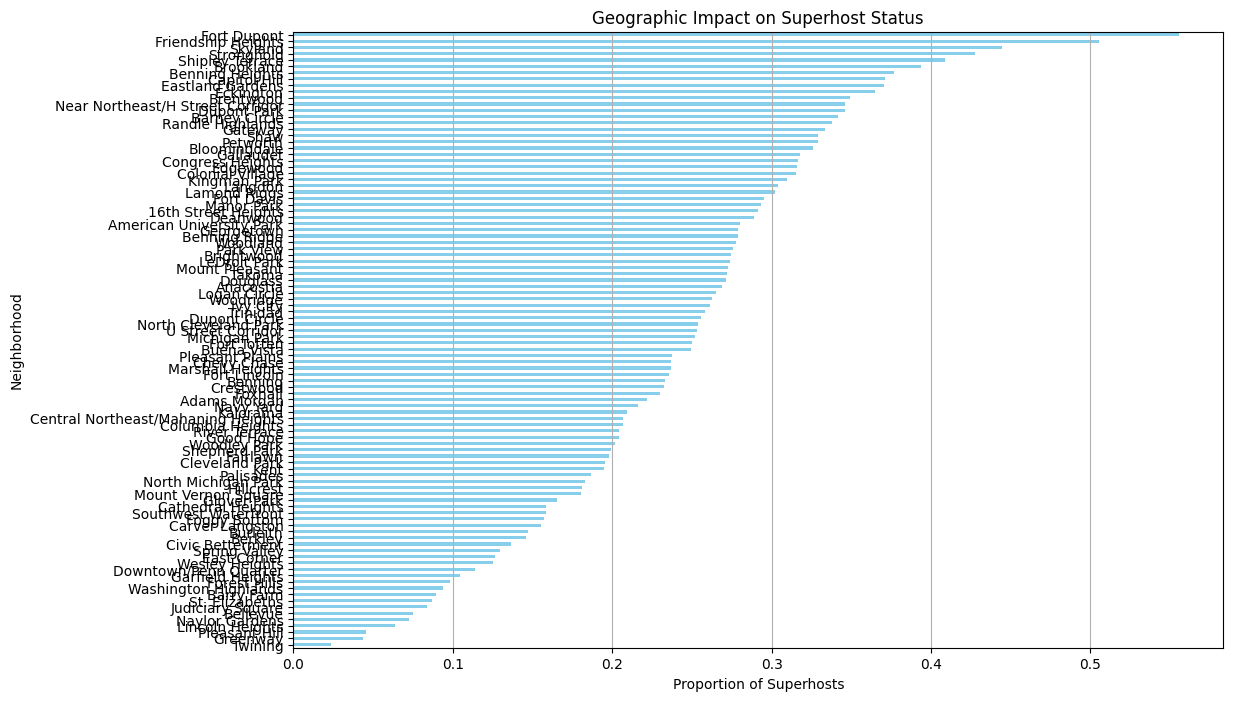

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Group by 'Neighborhood' and calculate the proportion of Superhosts in each neighborhood
neighborhood_superhost_proportion = df.groupby('Neighborhood')['host_is_superhost_in_period'].mean()

# Plotting the geographic impact
plt.figure(figsize=(12, 8))
neighborhood_superhost_proportion.sort_values().plot(kind='barh', color='skyblue')
plt.title('Geographic Impact on Superhost Status')
plt.xlabel('Proportion of Superhosts')
plt.ylabel('Neighborhood')
plt.grid(axis='x')
plt.show()


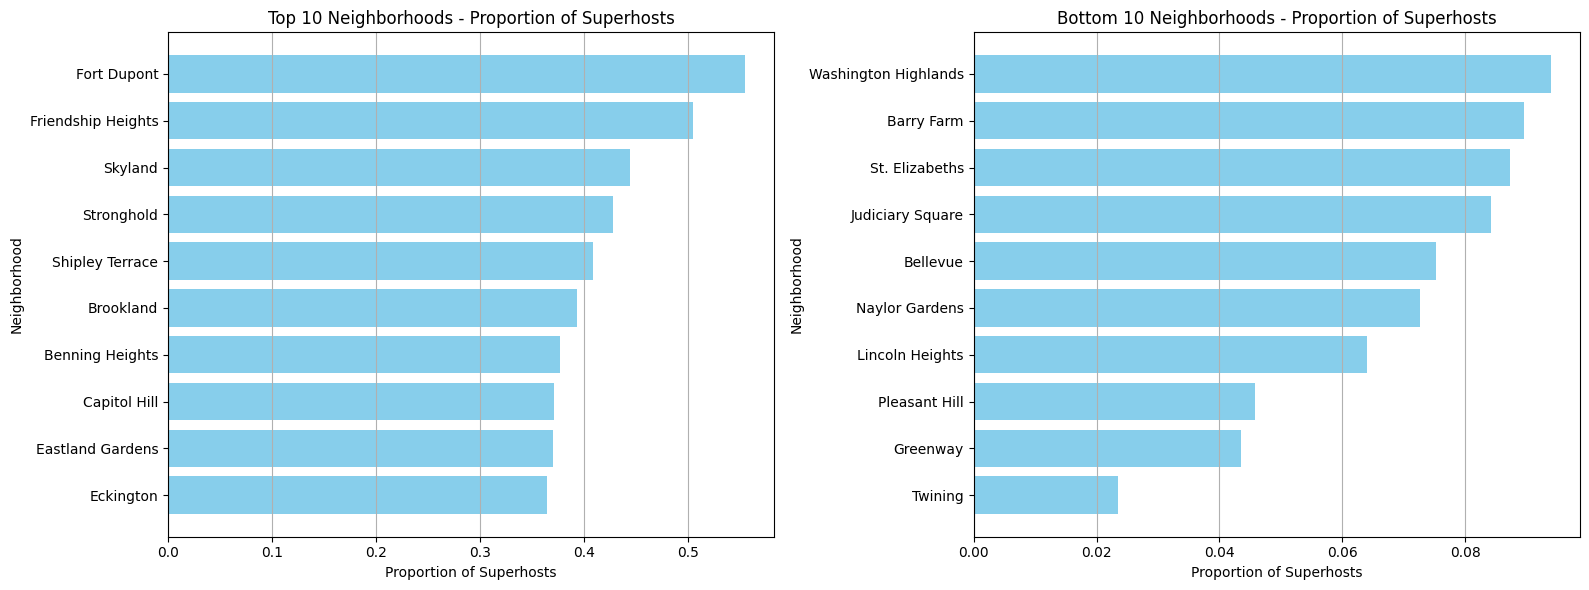

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Group by 'Neighborhood' and calculate the proportion of Superhosts in each neighborhood
neighborhood_superhost_proportion = df.groupby('Neighborhood')['host_is_superhost_in_period'].mean()

# Sorting neighborhoods based on the proportion of Superhosts
sorted_neighborhoods = neighborhood_superhost_proportion.sort_values()

# Selecting the top and bottom 10 neighborhoods
top_10 = sorted_neighborhoods.tail(10)
bottom_10 = sorted_neighborhoods.head(10)

# Plotting the geographic impact with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the top 10 neighborhoods
axs[0].barh(top_10.index, top_10.values, color='skyblue')
axs[0].set_title('Top 10 Neighborhoods - Proportion of Superhosts')
axs[0].set_xlabel('Proportion of Superhosts')
axs[0].set_ylabel('Neighborhood')
axs[0].grid(axis='x')

# Plot for the bottom 10 neighborhoods
axs[1].barh(bottom_10.index, bottom_10.values, color='skyblue')
axs[1].set_title('Bottom 10 Neighborhoods - Proportion of Superhosts')
axs[1].set_xlabel('Proportion of Superhosts')
axs[1].set_ylabel('Neighborhood')
axs[1].grid(axis='x')

plt.tight_layout()
plt.show()


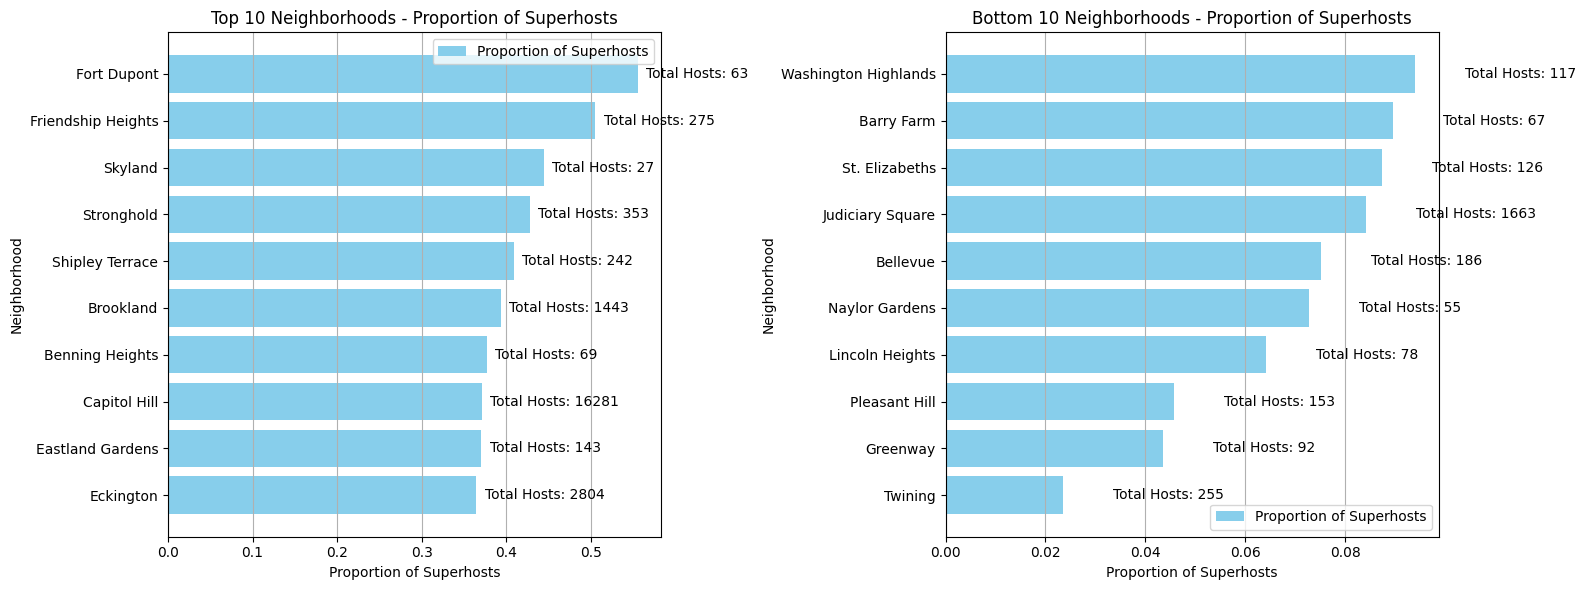

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Group by 'Neighborhood' and calculate the proportion of Superhosts and total count of hosts in each neighborhood
neighborhood_stats = df.groupby('Neighborhood')['host_is_superhost_in_period'].agg(['mean', 'count'])

# Sorting neighborhoods based on the proportion of Superhosts
sorted_neighborhoods = neighborhood_stats.sort_values(by='mean')

# Selecting the top and bottom 10 neighborhoods
top_10 = sorted_neighborhoods.tail(10)
bottom_10 = sorted_neighborhoods.head(10)

# Plotting the geographic impact with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the top 10 neighborhoods
axs[0].barh(top_10.index, top_10['mean'], color='skyblue', label='Proportion of Superhosts')
axs[0].set_title('Top 10 Neighborhoods - Proportion of Superhosts')
axs[0].set_xlabel('Proportion of Superhosts')
axs[0].set_ylabel('Neighborhood')
axs[0].grid(axis='x')
axs[0].legend()

# Add total count of hosts as text on the bars
for i, v in enumerate(top_10['count']):
    axs[0].text(top_10['mean'].iloc[i] + 0.01, i, f'Total Hosts: {v}', va='center')

# Plot for the bottom 10 neighborhoods
axs[1].barh(bottom_10.index, bottom_10['mean'], color='skyblue', label='Proportion of Superhosts')
axs[1].set_title('Bottom 10 Neighborhoods - Proportion of Superhosts')
axs[1].set_xlabel('Proportion of Superhosts')
axs[1].set_ylabel('Neighborhood')
axs[1].grid(axis='x')
axs[1].legend()

# Add total count of hosts as text on the bars
for i, v in enumerate(bottom_10['count']):
    axs[1].text(bottom_10['mean'].iloc[i] + 0.01, i, f'Total Hosts: {v}', va='center')

plt.tight_layout()
plt.show()


       rating_ave_pastYear  numReviews_pastYear  num_5_star_Rev_pastYear  \
count         94549.000000         95990.000000             95990.000000   
mean              4.735946           117.287801                91.774404   
std               0.318311           271.775086               218.011814   
min               1.000000             0.000000                 0.000000   
25%               4.625000             7.000000                 6.000000   
50%               4.808333            28.000000                23.000000   
75%               4.950000            87.000000                71.000000   
max               5.000000          2984.000000              2115.000000   

       superhost_change  
count     133741.000000  
mean           0.079415  
std            0.270386  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.000000  
max            1.000000  


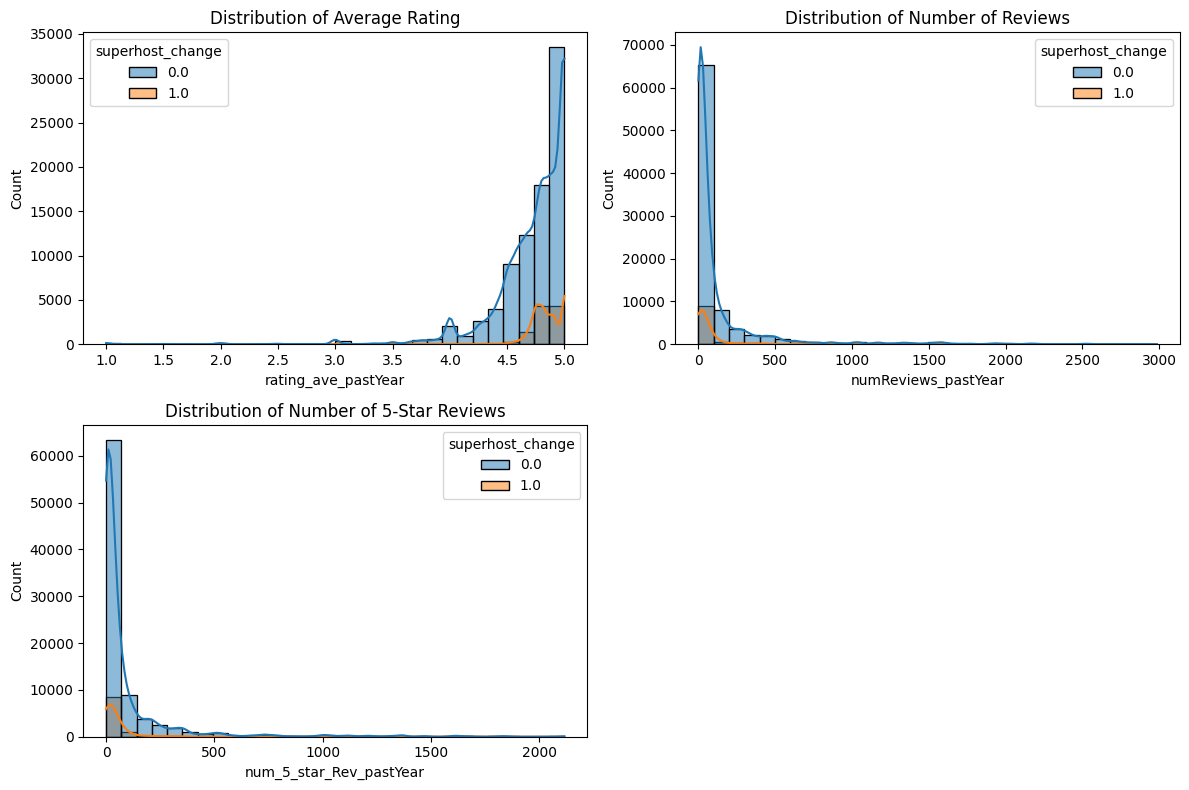

TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Check basic statistics and distribution of relevant variables
print(df[['rating_ave_pastYear', 'numReviews_pastYear', 'num_5_star_Rev_pastYear', 'superhost_change']].describe())

# Visualize the distribution of relevant variables for Superhosts and non-Superhosts
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df, x='rating_ave_pastYear', hue='superhost_change', kde=True, bins=30, common_norm=False)
plt.title('Distribution of Average Rating')

plt.subplot(2, 2, 2)
sns.histplot(df, x='numReviews_pastYear', hue='superhost_change', kde=True, bins=30, common_norm=False)
plt.title('Distribution of Number of Reviews')

plt.subplot(2, 2, 3)
sns.histplot(df, x='num_5_star_Rev_pastYear', hue='superhost_change', kde=True, bins=30, common_norm=False)
plt.title('Distribution of Number of 5-Star Reviews')

plt.tight_layout()
plt.show()

# Perform t-tests to compare means between Superhosts and non-Superhosts
print(ttest_ind(df[df['superhost_change'] == 1]['rating_ave_pastYear'], df[df['superhost_change'] == 0]['rating_ave_pastYear']))
print(ttest_ind(df[df['superhost_change'] == 1]['numReviews_pastYear'], df[df['superhost_change'] == 0]['numReviews_pastYear']))
print(ttest_ind(df[df['superhost_change'] == 1]['num_5_star_Rev_pastYear'], df[df['superhost_change'] == 0]['num_5_star_Rev_pastYear']))


            Bedrooms      Bathrooms     Max Guests  Cleaning Fee (USD)  \
count  133713.000000  133667.000000  133736.000000       101844.000000   
mean        1.368341       1.350479       3.611204           79.116561   
std         0.950297       0.778131       2.297925           63.839640   
min         0.000000       0.000000       1.000000            5.000000   
25%         1.000000       1.000000       2.000000           35.000000   
50%         1.000000       1.000000       3.000000           65.000000   
75%         2.000000       1.500000       4.000000          100.000000   
max        16.000000      50.000000      16.000000          649.000000   

        Minimum Stay  Number of Photos   Nightly Rate  Number of Reviews  \
count  133741.000000     133736.000000  133741.000000      133714.000000   
mean        7.038896         16.592234     212.623049          31.264677   
std        25.693691         11.697282     223.716250          54.470322   
min         1.000000         

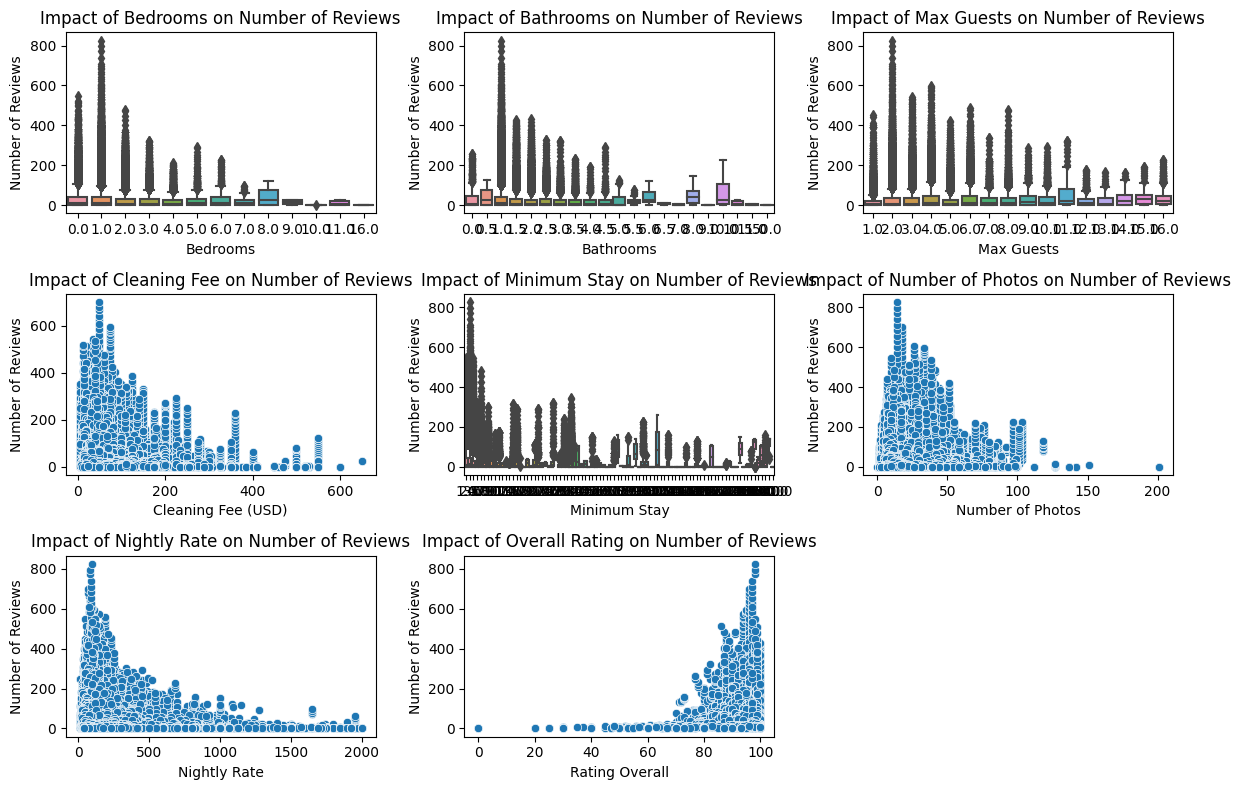

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Check basic statistics and distribution of relevant variables
print(df[['Bedrooms', 'Bathrooms', 'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate', 'Number of Reviews', 'Rating Overall']].describe())

# Visualize the impact of demographic factors on listing performance
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
sns.boxplot(x='Bedrooms', y='Number of Reviews', data=df)
plt.title('Impact of Bedrooms on Number of Reviews')

plt.subplot(3, 3, 2)
sns.boxplot(x='Bathrooms', y='Number of Reviews', data=df)
plt.title('Impact of Bathrooms on Number of Reviews')

plt.subplot(3, 3, 3)
sns.boxplot(x='Max Guests', y='Number of Reviews', data=df)
plt.title('Impact of Max Guests on Number of Reviews')

plt.subplot(3, 3, 4)
sns.scatterplot(x='Cleaning Fee (USD)', y='Number of Reviews', data=df)
plt.title('Impact of Cleaning Fee on Number of Reviews')

plt.subplot(3, 3, 5)
sns.boxplot(x='Minimum Stay', y='Number of Reviews', data=df)
plt.title('Impact of Minimum Stay on Number of Reviews')

plt.subplot(3, 3, 6)
sns.scatterplot(x='Number of Photos', y='Number of Reviews', data=df)
plt.title('Impact of Number of Photos on Number of Reviews')

plt.subplot(3, 3, 7)
sns.scatterplot(x='Nightly Rate', y='Number of Reviews', data=df)
plt.title('Impact of Nightly Rate on Number of Reviews')

plt.subplot(3, 3, 8)
sns.scatterplot(x='Rating Overall', y='Number of Reviews', data=df)
plt.title('Impact of Overall Rating on Number of Reviews')

plt.tight_layout()
plt.show()


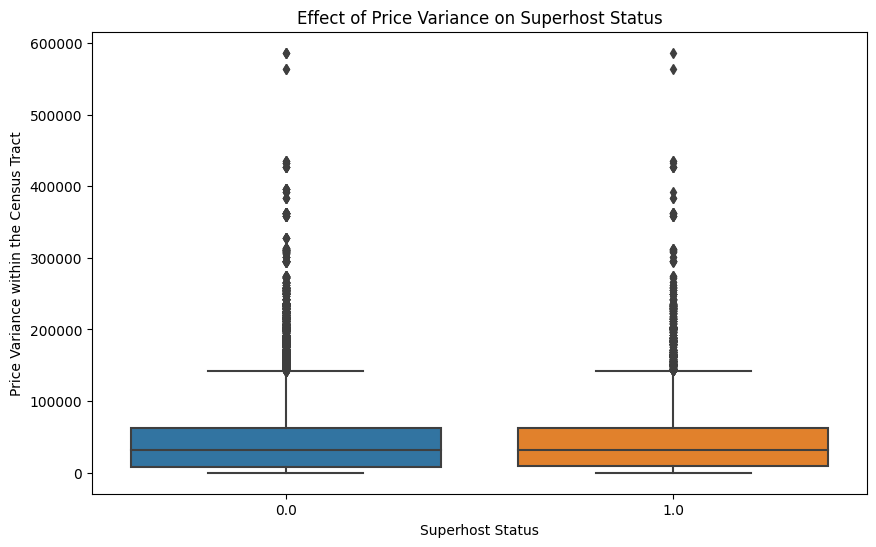

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Load your data into a DataFrame
# df = pd.read_csv('your_data.csv')

# Drop unnecessary columns and handle missing values
df = df.dropna(subset=['Superhost', 'tract_price_variance'])

# Explore the effect of price variance on Superhost status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Superhost', y='tract_price_variance', data=df)
plt.title('Effect of Price Variance on Superhost Status')
plt.xlabel('Superhost Status')
plt.ylabel('Price Variance within the Census Tract')

plt.show()
